In [1]:
# import libraries
import os
from os.path import dirname, realpath
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
PLOTS_DIR = os.path.join( "PROJECT_DIR_Multi_Layer_Percepton" ,"plots" )
if not os.path.exists(PLOTS_DIR):
    
    os.makedirs(PLOTS_DIR)

In [3]:
def Get_Data ():
    # fix random seed for reproducibility
    seed = 7
    numpy.random.seed(seed)
    # load data
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    # flatten 28*28 images to a 784 vector for each image
    num_pixels = X_train.shape[ 1 ] * X_train.shape[ 2 ]
    X_train = X_train.reshape(X_train.shape[ 0 ],
    num_pixels).astype( 'float32' )
    X_test = X_test.reshape(X_test.shape[ 0 ],
    num_pixels).astype( 'float32' )
    19
    # normalize inputs from 0-255 to 0-1
    X_train = X_train / 255
    X_test = X_test / 255
    # one hot encode outputs
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[ 1 ]
    return X_train, y_train, X_test, y_test

In [4]:
def Build_baseline_Model (activation_fn = "sigmoid" ,optimizer_name ="sgd" ,layers = 2 ,add_Dropout_layer=False, Dropout_value = 0.2 ):
    num_classes = 10
    num_pixels = 784
    # create model
    model = Sequential()
    model.add(Dense( 784 , input_dim=num_pixels,
    activation=activation_fn))
    model.add(Dense(num_classes, kernel_initializer= 'normal' ,
    activation= 'softmax' ))
    model.summary()
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer =
    optimizer_name, metrics=[ 'accuracy' ])
    return model

In [5]:
def change_Epoch (X_train, y_train, X_test, y_test, batch_size = 200 ,no_of_epochs = 10 ):
    plot_type = 'epochs'
    model1 = Build_baseline_Model()
    20
    history1 = model1.fit(X_train, y_train, validation_data=(X_test,
    y_test), batch_size=batch_size, epochs= 50 , verbose= 2 )
    score1 = model1.evaluate(X_test, y_test, verbose= 0 )
    plt.plot(history1.history[ 'val_acc' ])
    plt.plot(history1.history[ 'val_loss' ])
    plt.title( 'Model accuracy based on no. of Epoch' )
    plt.ylabel( 'accuracy' )
    plt.xlabel( 'epoch' )
    plt.legend([ 'val_acc' , 'val_loss' ], loc= 'upper right' )
    plt.savefig(PLOTS_DIR + '/acc_simple_{}.png' .format(plot_type))
    plt.show()
    plt.close()

In [6]:
def change_Activation_fn (X_train, y_train, X_test, y_test, batch_size= 200 , no_of_epochs = 10 ):
    plot_type= 'activation'
    model1 = Build_baseline_Model(activation_fn= "relu" )
    model2 = Build_baseline_Model(activation_fn= "tanh" )
    model3 = Build_baseline_Model(activation_fn= "sigmoid" )
    history1 = model1.fit(X_train, y_train, validation_data=(X_test,
    y_test), batch_size=batch_size, epochs=no_of_epochs, verbose= 2 )
    history2 = model2.fit(X_train, y_train, validation_data=(X_test,
    y_test), batch_size=batch_size, epochs=no_of_epochs, verbose= 2 )
    history3 = model3.fit(X_train, y_train, validation_data=(X_test,
    y_test), batch_size=batch_size, epochs=no_of_epochs, verbose= 2 )
    score1 = model1.evaluate(X_test, y_test, verbose= 0 )
    score2 = model2.evaluate(X_test, y_test, verbose= 0 )
    score3 = model3.evaluate(X_test, y_test, verbose= 0 )
    plt.plot(history1.history[ 'val_acc' ])
    plt.plot(history2.history[ 'val_acc' ])
    plt.plot(history3.history[ 'val_acc' ])
    21
    plt.title( 'Model accuracy based on no. of Activation function' )
    plt.ylabel( 'accuracy' )
    plt.xlabel( 'epoch' )
    legend1 = 'Relu(Test accuracy - {})' .format(score1[ 1 ])
    legend2 = 'Tanh(Test accuracy - {})' .format(score2[ 1 ])
    legend3 = 'Sigmoid(Test accuracy - {})' .format(score3[ 1 ])
    plt.legend([legend1, legend2, legend3], loc= 'lower right' )
    plt.savefig(PLOTS_DIR + '/acc_simple_{}.png' .format(plot_type))
    plt.show()
    plt.close()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
__________________________________________________________

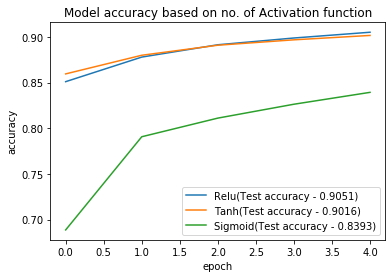

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 5s - loss: 2.0254 - acc: 0.5181 - val_loss: 1.7744 - val_acc: 0.7298
Epoch 2/50
 - 5s - loss: 1.5858 - acc: 0.7289 - val_loss: 1.3891 - val_acc: 0.7775
Epoch 3/50
 - 5s - loss: 1.2654 - acc: 0.7824 - val_loss: 1.1213 - val_acc: 0.8127
Epoch 4/50
 - 6s - loss: 1.0452 - acc: 0.8097 - val_loss: 0.9418 - val_acc: 0.8272
Epoch 5/50
 - 5s - loss: 0.8964 - acc: 0.8268 - val_loss: 0.8164 - val_acc: 0.8421
Epoch 6/50
 - 4s - loss: 0.7930 - acc: 0.8373 - val_loss: 0.7311 - 

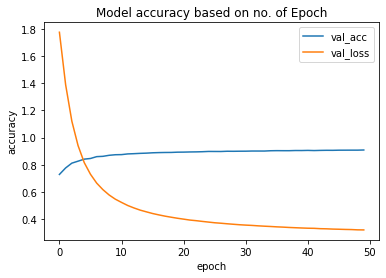

In [7]:
if __name__ == '__main__' :
    X_train, y_train, X_test, y_test = Get_Data()
    change_Activation_fn(X_train = X_train, y_train = y_train, X_test= X_test, y_test = y_test, no_of_epochs = 5 )
    change_Epoch(X_train = X_train, y_train = y_train, X_test =X_test, y_test = y_test, no_of_epochs = 5 )
    pass